In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'ELEKTRA.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,1096.000000,1041.119995,1054.910034,1057.670044,141460.0,1049.540039
2019-03-21,1066.000000,1041.000000,1065.000000,1057.489990,76434.0,1049.361328
2019-03-22,1077.979980,1026.000000,1060.000000,1048.869995,91643.0,1040.807617
2019-03-25,1059.800049,1037.000000,1055.000000,1051.670044,173056.0,1043.586182
2019-03-26,1068.000000,1045.510010,1055.890015,1050.050049,154138.0,1041.978638


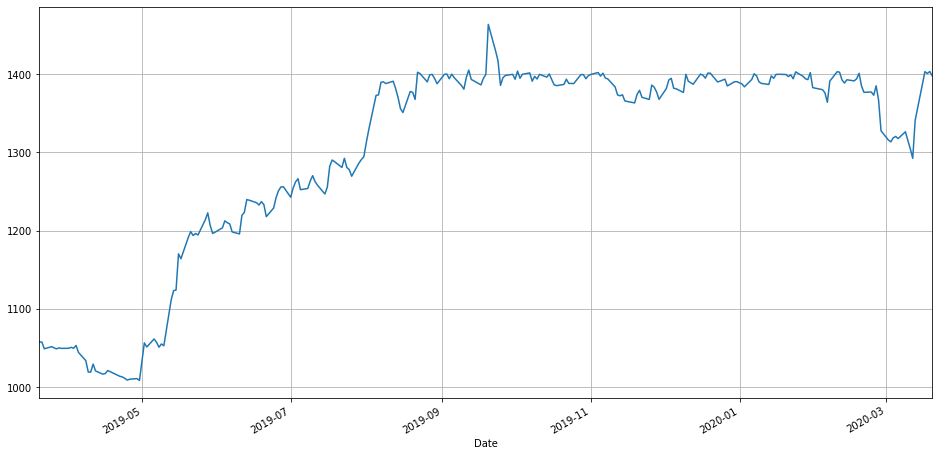

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

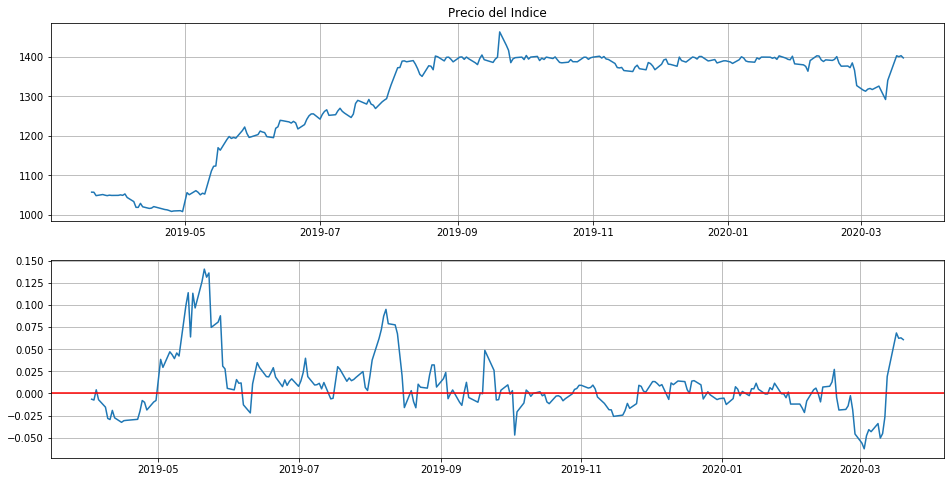

,Close,ROC_10,Recomendación
Date,,,
2019-04-04,1053.189941,0.004119,Se recomienda COMPRAR la acción.
2019-04-05,1044.260010,-0.007046,Se recomienda VENDER la acción.
2019-05-02,1056.489990,0.038524,Se recomienda COMPRAR la acción.
2019-06-07,1198.290039,-0.012859,Se recomienda VENDER la acción.
2019-06-11,1219.500000,0.010783,Se recomienda COMPRAR la acción.
2019-07-15,1246.780029,-0.006146,Se recomienda VENDER la acción.
2019-07-17,1282.229980,0.012564,Se recomienda COMPRAR la acción.
2019-08-16,1350.900024,-0.015974,Se recomienda VENDER la acción.
2019-08-19,1377.800049,0.003167,Se recomienda COMPRAR la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]